In [14]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [378]:
%autoreload
%matplotlib inline

import numpy as np
import physics as phys
import utilities as utils
import spectrum as spec
import transferfunction as tf
import matplotlib.pyplot as plt
import time as time

matplotlib.rcParams['figure.figsize'] = [10,10]


from scipy import integrate
from pylab import *

In [379]:
log_rs = np.log(4) + (np.arange(50)+1)*(np.log(31) - np.log(4))/50
log_rs = np.flipud(log_rs)

mmin = 5e3
mmax = 1e13
nwimpsteps = 40
mwimp = mmin*np.exp((np.arange(nwimpsteps))*np.log(mmax/mmin)/nwimpsteps)
mwimpmax = mwimp[-1]

nengsteps = 500
lowinjE = 3e3 + 100.
eng = lowinjE*np.exp((np.arange(nengsteps)*np.log(mwimpmax/lowinjE)/nengsteps))

In [380]:
tf_raw = np.load('/Users/hongwan/Dropbox (MIT)/transferfunction.npy')
tf_raw 
tf_raw = np.swapaxes(tf_raw,0,1)
tf_raw = np.swapaxes(tf_raw,1,2)
tf_raw = np.swapaxes(tf_raw,2,3)
tf_raw = np.flip(tf_raw,axis=0)
# Claim: tf ordering is now (1+z, xe, outE, injE), redshift in decreasing order.
print(tf_raw.shape)

#tf_raw_list is an array of dimensions [N_injE, N_rs, N_outE].  
tf_raw_list =[[spec.Spectrum(eng, tf_raw[i,0,:,j], exp(log_rs[i])) for i in np.arange(tf_raw.shape[0])] 
            for j in np.arange(tf_raw.shape[-1])]
#transfer_func_table is a list of length N_injE, each with a Transferfunction object, with rs and outE as abscissa.
transfer_func_table = [tf.Transferfunction(eng, spec_list, exp(log_rs)) for spec_list in tf_raw_list]

(50, 1, 500, 500)


In [381]:
#Normalize each transfer_func in transfer_func_table by dN/dE of a single particle of injE. 
#Two particles injected initially. 
dNdE_norm = spec.rebin_N_arr(np.ones(eng.size), eng, eng)

for i in np.arange(eng.size):
    transfer_func_table[i] /= (2*dNdE_norm.dNdE[i])

In [382]:
#Initialize
start_mwimp = eng[299]
rs_list = np.exp(np.arange(log_rs[0], log_rs[0]-0.004, -0.002))

photon_spec_init = spec.rebin_N_arr(np.array([2]), np.array([eng[299]]), eng)

In [383]:
print(rs_list)

[ 31.          30.93806196  30.87624767]


In [384]:
photon_spectra = spec.Spectra(photonspec.eng, [photon_spec_init], np.array(rs_list[0]))

for rs in rs_list:
    tf_at_rs = tf.Transferfunction(eng, [transfer_func.at_rs(rs) for transfer_func in transfer_func_table], 
                                   rs*np.ones(eng.size)) 
    photon_spectra.append(tf_at_rs.sum_specs_by_weight(photon_spectra[-1]))
    photon_spectra[-1].rs = rs  

In [386]:
print(photon_spectra[1].dNdE)

[  8.28428648e-04   6.73898270e-04   7.65523336e-04   8.60169896e-04
   5.46738025e-04   5.11566363e-04   7.53119198e-04   4.88566719e-04
   4.14365678e-04   4.88435097e-04   5.10581041e-04   3.35127245e-04
   3.13432489e-04   4.74345872e-04   2.85552366e-04   2.52997603e-04
   3.08968260e-04   3.00434373e-04   2.03847460e-04   1.90556839e-04
   2.96132646e-04   1.65158060e-04   1.53177695e-04   1.93487941e-04
   1.74999812e-04   1.22870563e-04   1.19293411e-04   1.74472609e-04
   9.83299769e-05   9.18185118e-05   1.19751234e-04   1.00699934e-04
   7.32556505e-05   7.42369438e-05   1.00603158e-04   5.82786150e-05
   5.43733521e-05   7.30939954e-05   5.70977907e-05   4.30944785e-05
   4.54774410e-05   5.71279421e-05   3.40341516e-05   3.17211734e-05
   4.38760889e-05   3.18017220e-05   2.49367637e-05   2.73379103e-05
   3.18393040e-05   1.95172538e-05   1.81671206e-05   2.58019794e-05
   1.73297006e-05   1.41384438e-05   1.60607671e-05   1.73356913e-05
   1.09423664e-05   1.01688612e-05

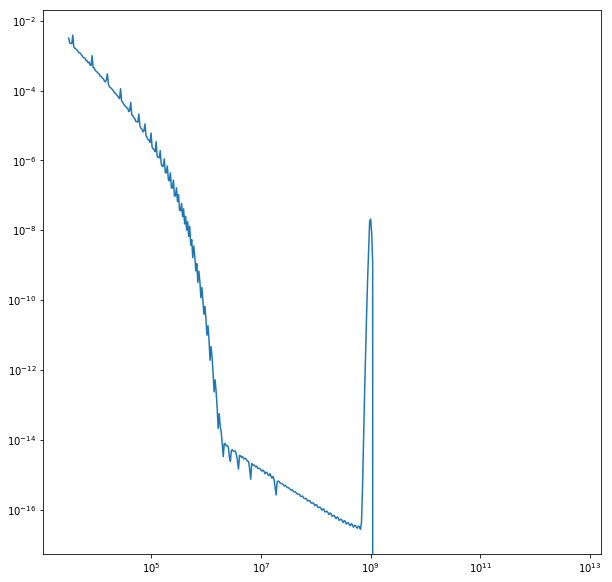

In [388]:
a = photon_spectra.plot(3)
ax = a.add_subplot(1,1,1)
ax.set_xscale('log')
ax.set_yscale('log')

In [320]:
# Spectrum needs to be re-binned for comparison
dlnphoteng   = np.log((phys.me*1e-9 + start_mwimp)/1e-4)/500
photbins     = 1e-4*np.exp(np.arange(501)*dlnphoteng)
photenglow   = photbins[0:500]
photenghigh  = photbins[1:501]
photeng      = np.sqrt(photenglow*photenghigh) 
newphotspec = spec.Spectrum(photonspec.eng[0:299], photonspec.dNdE[0:299], photonspec.rs)
newphotspec.rebin(photeng)
print(newphotspec.dNdE)

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00